# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [20]:
# importando todas as bibliotecas
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [21]:
# Carregando a base de dados
tips = sns.load_dataset('tips')
tips['tip_pct'] = (tips['tip']/ (tips['total_bill']))*100
tips['net_bill'] = tips['total_bill'] - tips['tip']

In [22]:
X = tips['net_bill']
y = tips['tip_pct']

# Modelo de regressão
reg = smf.ols('tip_pct ~ net_bill', data= tips).fit()

# Utilizando o método para predizer as variáveis independetes (X)
tips['tip_pct_predito'] = reg.predict(tips['net_bill'])

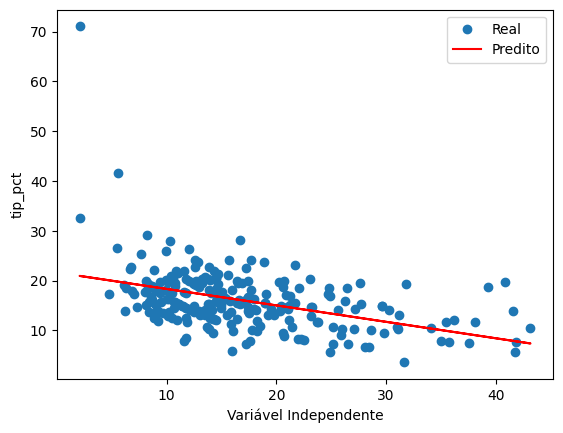

In [23]:
# Criar um gráfico comparando os dados reais e preditos
plt.scatter(tips['net_bill'], tips['tip_pct'], label='Real')
plt.plot(tips['net_bill'], tips['tip_pct_predito'], label='Predito', color='red')
plt.xlabel('Variável Independente')
plt.ylabel('tip_pct')
plt.legend()
plt.show()

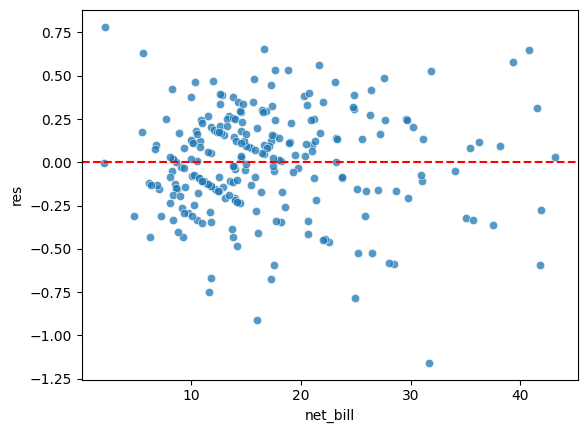

In [43]:
# Verificando os resíduos
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

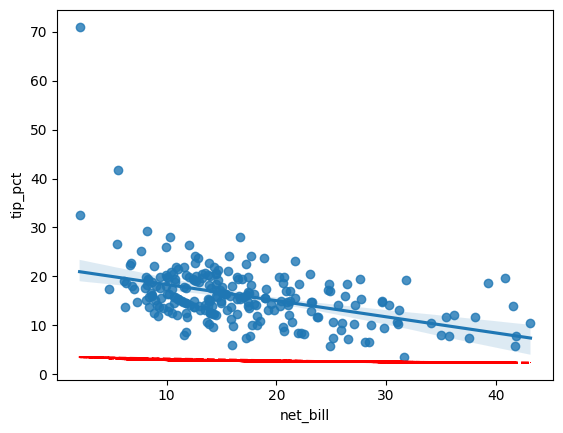

In [41]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     98.21
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           1.19e-19
Time:                        02:14:13   Log-Likelihood:                -745.67
No. Observations:                 244   AIC:                             1495.
Df Residuals:                     242   BIC:                             1502.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.6800      1.906  

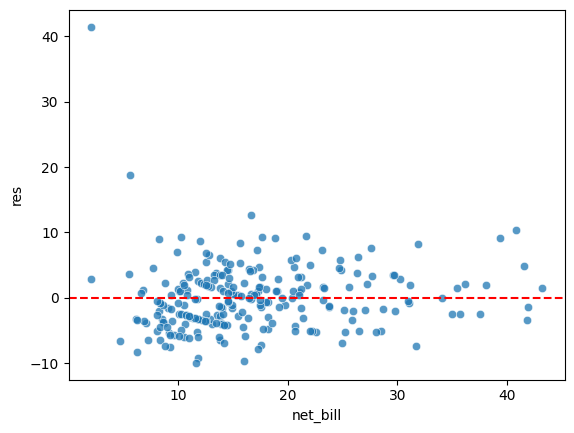

In [26]:
reg = smf.ols('tip_pct ~ np.log(net_bill)', data= tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     37.33
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           3.96e-09
Time:                        02:14:13   Log-Likelihood:                -769.73
No. Observations:                 244   AIC:                             1543.
Df Residuals:                     242   BIC:                             1550.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                18.26

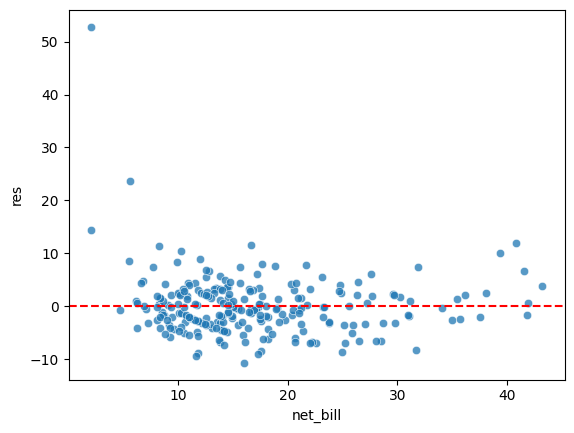

In [27]:
reg = smf.ols('tip_pct ~ np.power(net_bill,2)', data= tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

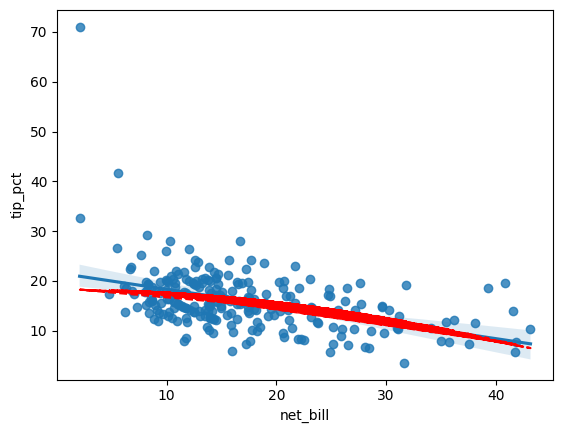

In [28]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     77.95
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           2.18e-16
Time:                        02:15:43   Log-Likelihood:                -55.678
No. Observations:                 244   AIC:                             115.4
Df Residuals:                     242   BIC:                             122.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0787      0.045     67.886      0.0

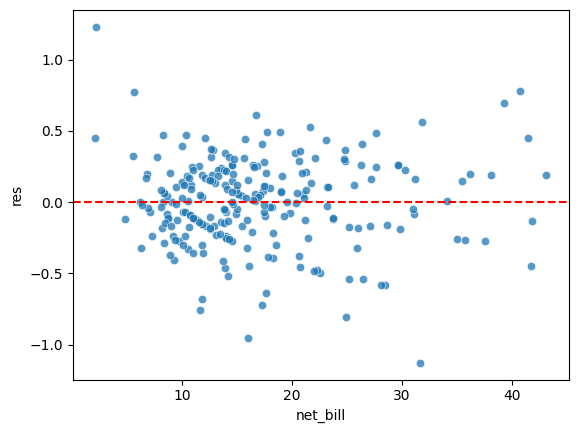

In [30]:
reg = smf.ols('np.log(tip_pct) ~ net_bill', data= tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

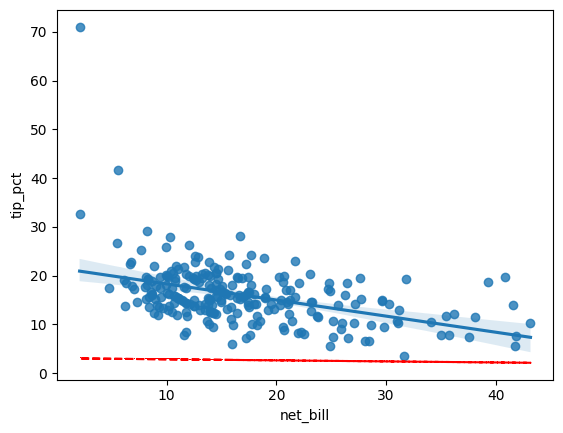

In [33]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], reg.fittedvalues, 'r,--')

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     94.10
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.26e-19
Time:                        02:19:03   Log-Likelihood:                -49.670
No. Observations:                 244   AIC:                             103.3
Df Residuals:                     242   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7679      0.110  

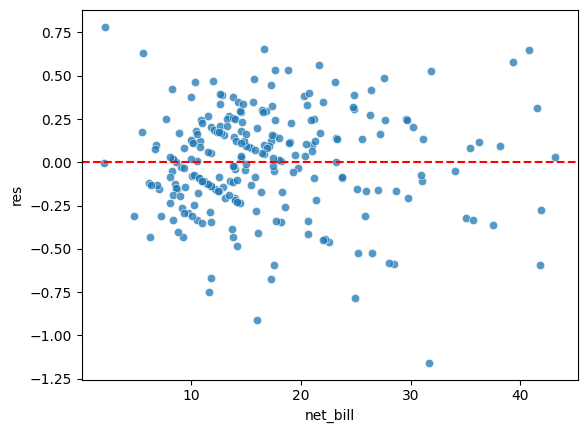

In [34]:
reg = smf.ols('np.log(tip_pct) ~ np.log(net_bill)', data= tips).fit()
print(reg.summary())
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     94.10
Date:                Wed, 22 Nov 2023   Prob (F-statistic):           5.26e-19
Time:                        02:22:04   Log-Likelihood:                -49.670
No. Observations:                 244   AIC:                             103.3
Df Residuals:                     242   BIC:                             110.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7679      0.110  

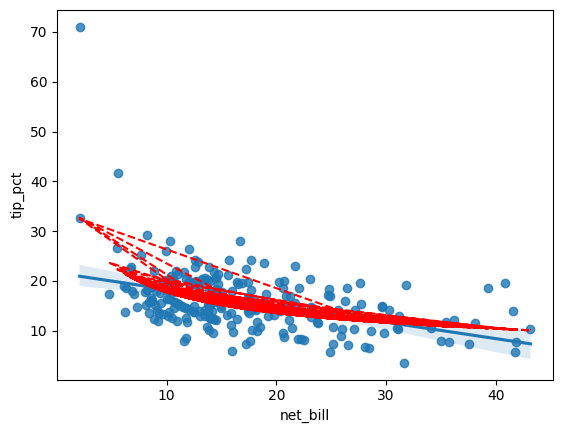

In [39]:
tips['pred_y'] = np.exp(reg.fittedvalues)

tips[['pred_y', 'tip_pct']].corr().iloc[0,1]**2

sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)
plt.plot(tips['net_bill'], tips['pred_y'], 'r,--')
print(reg.summary())

###  6. qual modelo resultou no melhor ajuste?

`reg = smf.ols('tip_pct ~ np.log(net_bill)', data= tips).fit()`

O modelo que melhor se ajustou foi o com o net_bill na base log, tendo um $R^2$ próximo à 30%